In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
import keras
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import np_utils

Using TensorFlow backend.


In [0]:
data_train=pd.read_csv('/content/drive/My Drive/fer2013_train_new1.csv')
data_test=pd.read_csv('/content/drive/My Drive/fer2013_test_new1.csv')

In [0]:
classdist=data_train['emotion'].value_counts()

In [0]:
#classdistribution in train data
classdist

3    5886
6    2984
5    2439
0    2166
4    1987
2     839
1     443
Name: emotion, dtype: int64

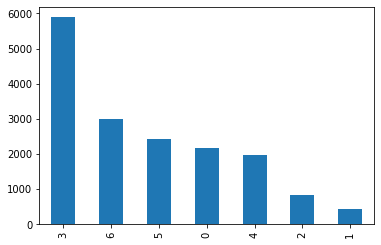

In [0]:
classdist. plot(kind='bar')

In [0]:
classdist1=data_test['emotion'].value_counts()

In [0]:
#class distribution in test data
classdist1

3    1441
6     747
5     657
0     508
4     485
2     217
1      89
Name: emotion, dtype: int64

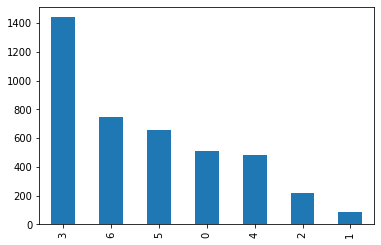

In [0]:
classdist1.plot(kind="bar")

In [0]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16744 entries, 0 to 16743
Data columns (total 3 columns):
emotion    16744 non-null int64
Usage1     16744 non-null object
pixels1    16744 non-null object
dtypes: int64(1), object(2)
memory usage: 392.6+ KB


In [0]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4144 entries, 0 to 4143
Data columns (total 4 columns):
Unnamed: 0    4059 non-null float64
emotion       4144 non-null int64
Usage1        4144 non-null object
pixels1       4144 non-null object
dtypes: float64(1), int64(1), object(2)
memory usage: 129.6+ KB


In [0]:
# x_train
b=[]
import numpy as np
for index ,row in data_train.iterrows():
    val=row['pixels1'].split(" ")
    for i in val:
        a=int(i)
        b.append(a)
arr=np.array(b,'float32')
x_train=arr.reshape(16744,2304)

In [0]:
# x_test
b=[]
for index ,row in data_test.iterrows():
    val=row['pixels1'].split(" ")
    for i in val:
        a=int(i)
        b.append(a)
arr=np.array(b,'float32')
x_test=arr.reshape(4144,2304)

In [0]:
#y_train
y_train=np.array(data_train['emotion'].tolist(),'float32')

In [0]:
# y_test
y_test=np.array(data_test['emotion'].tolist(),'float32')

In [0]:
# reshape 
x_train = x_train.reshape(x_train.shape[0], 48, 48, 1)
x_train = x_train.astype('float32')
x_test = x_test.reshape(x_test.shape[0], 48, 48, 1)
x_test = x_test.astype('float32')

In [0]:
# One hot code
y_train=np_utils.to_categorical(y_train,num_classes=7)
y_test=np_utils.to_categorical(y_test,num_classes=7)

In [0]:
# normalize
x_train /= 255
x_test /= 255

In [0]:
import keras,os
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from keras.preprocessing.image import ImageDataGenerator
import numpy as np

In [13]:
model = Sequential()
model.add(Conv2D(input_shape=(48,48,1),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(5,5),strides=(5,5)))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(3,3),strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(3,3),strides=(2,2)))
model.add(Flatten())
model.add(Dense(units=1024,activation="relu"))
model.add(Dense(units=1024,activation="relu"))
model.add(Dense(units=7, activation="softmax"))

In [14]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 48, 48, 64)        640       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 9, 9, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 9, 9, 64)          36928     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 9, 9, 64)          36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 4, 4, 128)         73856     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 4, 4, 128)        

In [0]:
gen = ImageDataGenerator()
train_generator = gen.flow(x_train, y_train, batch_size=256)

In [0]:
#from keras.optimizers import Adam 
#opt=Adam(lr=0.001)

In [16]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [17]:
hist=model.fit_generator(train_generator, steps_per_epoch=256, epochs=30,validation_data=(x_test,y_test)) 

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/30





256/256 [==============================] - 22s 85ms/step - loss: 1.4046 - acc: 0.4798 - val_loss: 0.9114 - val_acc: 0.6728
Epoch 2/30
256/256 [==============================] - 6s 23ms/step - loss: 0.6983 - acc: 0.7532 - val_loss: 0.7884 - val_acc: 0.7268
Epoch 3/30
256/256 [==============================] - 6s 23ms/step - loss: 0.4083 - acc: 0.8568 - val_loss: 0.6916 - val_acc: 0.7770
Epoch 4/30
256/256 [==============================] - 6s 23ms/step - loss: 0.2378 - acc: 0.9178 - val_loss: 0.7110 - val_acc: 0.8190
Epoch 5/30
256/256 [==============================] - 6s 23ms/step - loss: 0.1254 - acc: 0.9562 - val_loss: 0.9088 - val_acc: 0.7990
Epoch 6/30
256/256 [==============================] - 6s 23ms/step - loss: 0.0767 - acc: 0.9732 - val_loss: 0.9692 - val_acc: 0.8263
Epoch 7/30
256/256 [==============================] - 6s 23ms/step - loss: 0.0604 - acc: 0.9792 - v

In [0]:
train_loss=hist.history['loss']
test_loss=hist.history['val_loss']

In [0]:
epoches=range(1,31)

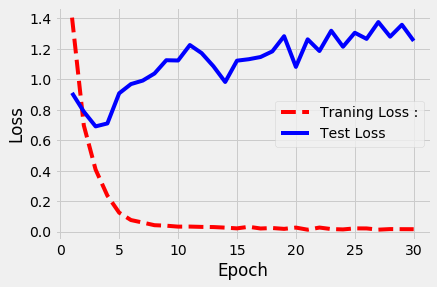

In [20]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.plot(epoches,train_loss,"r--")
plt.plot(epoches,test_loss,"b-")
plt.legend(["Traning Loss :","Test Loss"])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

In [0]:
train_acc=hist.history['acc']
test_acc=hist.history['val_acc']

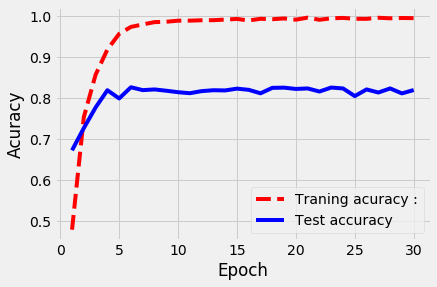

In [22]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.plot(epoches,train_acc,"r--")
plt.plot(epoches,test_acc,"b-")
plt.legend(["Traning acuracy :","Test accuracy"])
plt.xlabel("Epoch")
plt.ylabel("Acuracy")
plt.show()

In [0]:
import pandas as pd
result=pd.DataFrame({'traing loss':train_loss,'traing accuracy':train_acc,'test loss':test_loss,'test accuracy ':test_acc})

In [24]:
result.describe()

,traing loss,traing accuracy,test loss,test accuracy
count,30.000000,30.000000,30.000000,30.000000
mean,0.119474,0.957447,1.116796,0.808912
std,0.281510,0.103304,0.181627,0.031993
min,0.013617,0.479562,0.691649,0.672780
25%,0.019653,0.984999,1.003859,0.812198
50%,0.027556,0.990628,1.139714,0.819015
75%,0.042274,0.993516,1.260497,0.822695
max,1.405437,0.995734,1.376380,0.826255


In [0]:
hist.model.save('/content/drive/My Drive/modelface_cnn_network3.h5')

In [0]:
from sklearn.metrics import classification_report, confusion_matrix

In [0]:
import numpy as np
y_test_hat=hist.model.predict(x_test)
prediction=[]
for i in range(len(y_test)):
    prediction.append(np.argmax(y_test_hat[i]))  


In [0]:
actual=y_test=np.array(data_test['emotion'].tolist(),'float32')

In [31]:
confusion_matrix(actual,prediction)

array([[ 382,   12,   10,   43,   30,    7,   24],
       [  21,   53,    6,    3,    1,    0,    5],
       [  16,    3,  130,   16,   23,   17,   12],
       [  37,    8,    8, 1289,   39,   14,   46],
       [  39,    0,   30,   36,  325,    6,   49],
       [   4,    0,   15,    6,    4,  616,   12],
       [  43,    2,   20,   22,   40,   19,  601]])

In [0]:
objects = ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']

In [33]:
print(classification_report(actual,prediction,target_names=objects))

              precision    recall  f1-score   support

       angry       0.70      0.75      0.73       508
     disgust       0.68      0.60      0.63        89
        fear       0.59      0.60      0.60       217
       happy       0.91      0.89      0.90      1441
         sad       0.70      0.67      0.69       485
    surprise       0.91      0.94      0.92       657
     neutral       0.80      0.80      0.80       747

    accuracy                           0.82      4144
   macro avg       0.76      0.75      0.75      4144
weighted avg       0.82      0.82      0.82      4144

